In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os
import cv2    
from tqdm import tqdm
import random as random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPool2D,BatchNormalization
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [ ]:
imagedetails = []
imagelabels = []
IMG_SIZE=150
#definig the path for each type in the drive
daisy_dir='/content/drive/My Drive/flowers/daisy'
sunflower_dir='/content/drive/My Drive/flowers/sunflower'
tulip_dir='/content/drive/My Drive/flowers/tulip'
dandelion_dir='/content/drive/My Drive/flowers/dandelion'
rose_dir='/content/drive/My Drive/flowers/rose'

In [ ]:

def read_image(label,DIR):
    
    for img in tqdm(os.listdir(DIR)):
    #for img in DIR:
        path = os.path.join(DIR,img)
        #checking image type
        _, ftype = os.path.splitext(path)
        if ftype == ".jpg":
       
            image = cv2.imread(path,cv2.IMREAD_COLOR)
            image = cv2.resize(image, (IMG_SIZE,IMG_SIZE),interpolation = cv2.INTER_AREA)
            imagedetails.append(np.array(image))
            imagelabels.append(str(label))

read_image("Daisy",daisy_dir)
read_image("Sunflower",sunflower_dir)
read_image("Tulip",tulip_dir)
read_image("Dandelion",dandelion_dir)
read_image("Rose",rose_dir)

100%|██████████| 784/784 [06:20<00:00,  2.06it/s]


In [ ]:
encoder = LabelEncoder()
#converting the images into arrays which will have its intensity values
X = np.array(imagedetails)
print(X)
#divide by 255 is to make the analysis easy because each color 8 plains (2^8==256)
X = X/255
print(X)
print(imagelabels)
#transformig the image labels into integers because it easy to deal with integers compared to strings;
y = encoder.fit_transform(imagelabels)
#dividing into 5 categories
y = to_categorical(y,5)
print(y)
print(X.shape)
print(y.shape)

[[[[ 81  16  27]
   [ 79  16  26]
   [ 79  16  25]
   ...
   [126  70  72]
   [106  58  71]
   [100  57  77]]

  [[ 79  17  27]
   [ 79  16  25]
   [ 78  16  24]
   ...
   [104  44  53]
   [100  48  62]
   [ 97  51  71]]

  [[ 77  16  26]
   [ 77  16  26]
   [ 79  16  25]
   ...
   [102  40  54]
   [101  46  61]
   [ 92  48  67]]

  ...

  [[ 39  10  17]
   [ 71  22  39]
   [ 88  30  53]
   ...
   [ 50  15  25]
   [ 55  19  32]
   [ 70  28  48]]

  [[ 64  19  33]
   [ 86  28  51]
   [101  40  62]
   ...
   [ 49  14  26]
   [ 50  15  28]
   [ 52  15  28]]

  [[ 84  28  48]
   [ 94  34  57]
   [107  46  67]
   ...
   [ 48  11  20]
   [ 48  13  26]
   [ 48  13  26]]]


 [[[134 136 136]
   [143 144 144]
   [147 147 147]
   ...
   [151 153 153]
   [152 154 154]
   [152 152 152]]

  [[133 135 135]
   [142 143 143]
   [146 146 146]
   ...
   [151 153 153]
   [152 153 153]
   [150 150 150]]

  [[131 134 134]
   [139 141 142]
   [144 144 146]
   ...
   [152 154 154]
   [150 152 152]
   [147 147

In [ ]:
#dividing the entire dataset into training data and validation data
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.2,random_state=42)
#dividing the training dataset into training and testing
X_train,X_test,y_train,y_test = train_test_split(X_train,y_train,test_size=0.2,random_state=42)
X_train.shape,y_train.shape,X_valid.shape,y_valid.shape,X_test.shape,y_test.shape
# sum should result in total(4333)

((2769, 150, 150, 3),
 (2769, 5),
 (866, 150, 150, 3),
 (866, 5),
 (693, 150, 150, 3),
 (693, 5))

In [ ]:
batch_size = 64
# as we increase the number of epochs the accuracy will increase
epochs = 30
num_classes = y.shape[1]

In [ ]:
imagegen = ImageDataGenerator(featurewise_center=False,
                             samplewise_center=False,
                             featurewise_std_normalization=False,
                             samplewise_std_normalization=False,
                            rotation_range=60,
                              zoom_range=0.1,
                              width_shift_range=0.1,
                              height_shift_range=0.1,
                              shear_range=0.1,
                              fill_mode='reflect')
imagegen.fit(X_train)

In [ ]:

'''model = Sequential()
#we are using sequential model

#kernel size is mask                                                                                                                              xrnel
model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D((2, 2)))
#dropout is used to prevent the overfitting by a given percentage
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(5, activation='softmax'))'''

In [ ]:
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu',padding='same',input_shape=(IMG_SIZE,IMG_SIZE,3)))
model.add(MaxPool2D((2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size= (3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Conv2D(256, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3, 3), activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2, 2),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())

model.add(Dense(num_classes, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 150, 150, 64)      1792      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 75, 75, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 75, 75, 64)        256       
_________________________________________________________________
dropout_3 (Dropout)          (None, 75, 75, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 75, 75, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 38, 38, 128)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 38, 38, 128)      

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,ReduceLROnPlateau
checkpoint = ModelCheckpoint(filepath = 'cnn3.hdf5',monitor='val_accuracy' ,verbose = 1, save_best_only = True)
#reduce_lr=ReduceLROnPlateau(monitor='val_loss',factor=0.1,patience=2,min_lr=0.00001,mode='auto')
model_dropout = model.fit_generator(imagegen.flow(X_train,y_train, batch_size=batch_size),epochs=30,verbose=2,
                          validation_data=imagegen.flow(X_valid, y_valid),steps_per_epoch=X_train.shape[0] // batch_size,callbacks=[checkpoint],shuffle=True)
# even if we change the steps_per_epoch ten also the accuracy will increase

Epoch 1/30

Epoch 00001: val_accuracy improved from -inf to 0.23095, saving model to cnn3.hdf5
43/43 - 18s - loss: 1.8007 - accuracy: 0.4665 - val_loss: 2.4429 - val_accuracy: 0.2309
Epoch 2/30

Epoch 00002: val_accuracy did not improve from 0.23095
43/43 - 17s - loss: 1.2216 - accuracy: 0.5383 - val_loss: 2.7599 - val_accuracy: 0.2298
Epoch 3/30

Epoch 00003: val_accuracy did not improve from 0.23095
43/43 - 17s - loss: 1.1260 - accuracy: 0.5726 - val_loss: 3.0400 - val_accuracy: 0.2286
Epoch 4/30

Epoch 00004: val_accuracy did not improve from 0.23095
43/43 - 17s - loss: 1.0733 - accuracy: 0.6015 - val_loss: 1.8926 - val_accuracy: 0.2298
Epoch 5/30

Epoch 00005: val_accuracy improved from 0.23095 to 0.23326, saving model to cnn3.hdf5
43/43 - 18s - loss: 1.0163 - accuracy: 0.6122 - val_loss: 2.5593 - val_accuracy: 0.2333
Epoch 6/30

Epoch 00006: val_accuracy did not improve from 0.23326
43/43 - 17s - loss: 0.9244 - accuracy: 0.6532 - val_loss: 2.4236 - val_accuracy: 0.2309
Epoch 7/30


In [ ]:
test_eval = model.evaluate(X_test, y_test, verbose=1)
print('\n', 'Test Loss','Test accuracy:', test_eval[0],test_eval[1])

22/22 [==============================] - 0s 16ms/step - loss: 0.6548 - accuracy: 0.7619

 Test Loss Test accuracy: 0.6548436880111694 0.761904776096344


In [ ]:
#for the train set X we are calculating the output y using the model defined above 
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1).astype(int)
# converting both the values to int will help us to compare easily
y_true = np.argmax(y_test,axis = 1).astype(int)

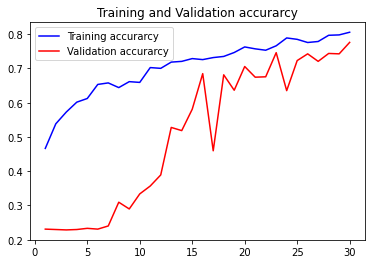

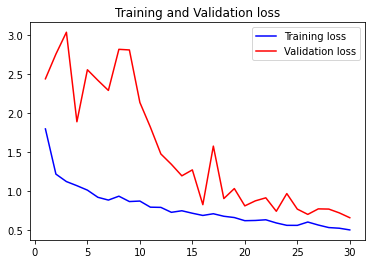

In [ ]:
acc = model_dropout.history['accuracy']
val_acc = model_dropout.history['val_accuracy']
loss = model_dropout.history['loss']
val_loss = model_dropout.history['val_loss']
epochs = range(1, len(acc) + 1)
#Train and validation accuracy
plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and Validation accurarcy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()

In [ ]:
corr=[]
incorr=[]
corr_count=0
incorr_count=0

for i in range(len(y_test)):
   # checking for correct predictions
    if(y_pred[i]==y_true[i]):
        corr.append(i)
        corr_count+=1
    else:
        incorr.append(i)
        incorr_count+=1
        
print("%d flowers are identified correctly" %(corr_count))
print("%d flowers are identified incorrectly" %(incorr_count))

528 flowers are identified correctly
165 flowers are identified incorrectly


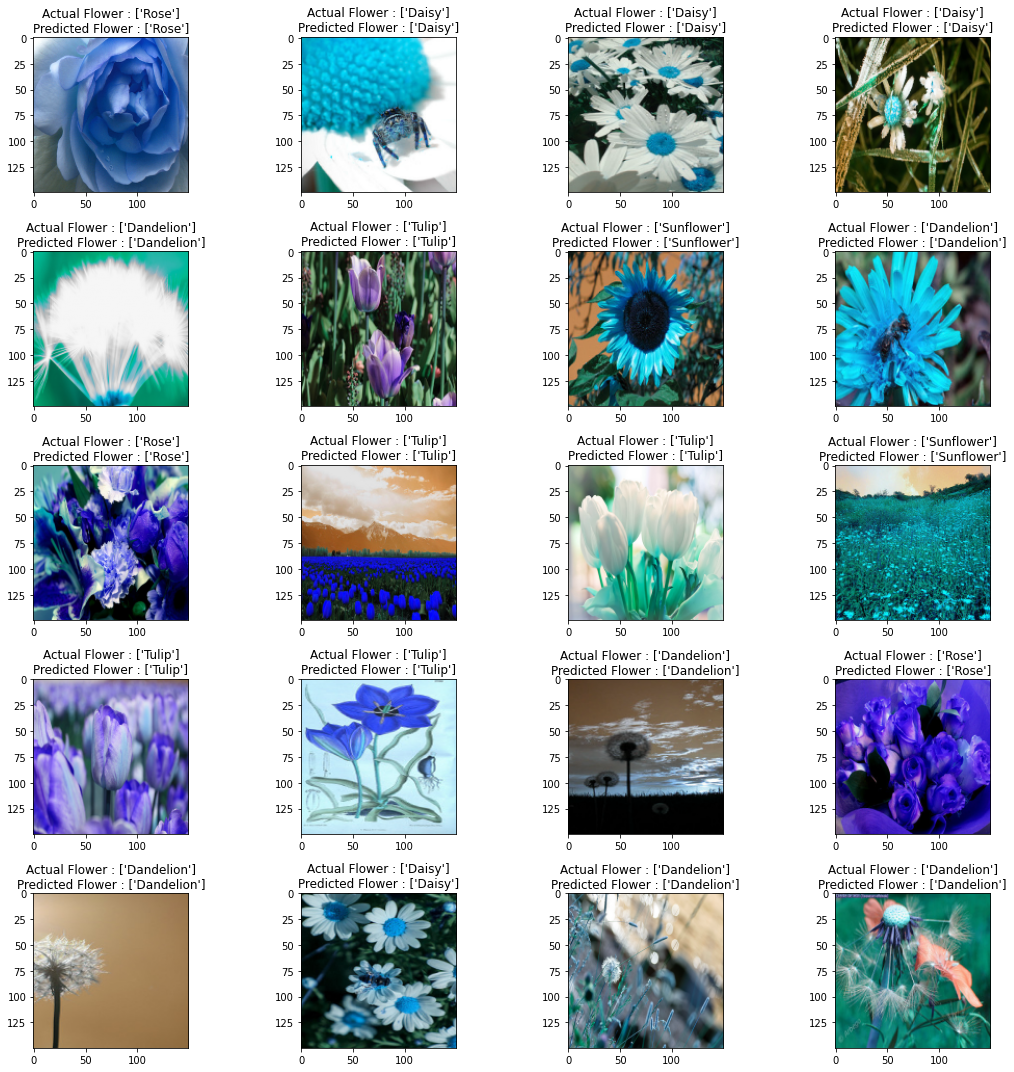

In [ ]:
fig,ax = plt.subplots(num_classes,4)
fig.set_size_inches(15,15)
# printing some correctly found flowers
count = 0
for i in range (num_classes):
   for j in range (4):
        
        ax[i,j].imshow(X_test[corr[count]])
        #inverse_transform is done because we use encoder to change String to int
        ax[i,j].set_title("Actual Flower : "+str(encoder.inverse_transform([y_true[corr[count]]])) +  "\n" + "Predicted Flower : "+str(encoder.inverse_transform([y_pred[corr[count]]])))
        
        count+=1
        
plt.tight_layout()

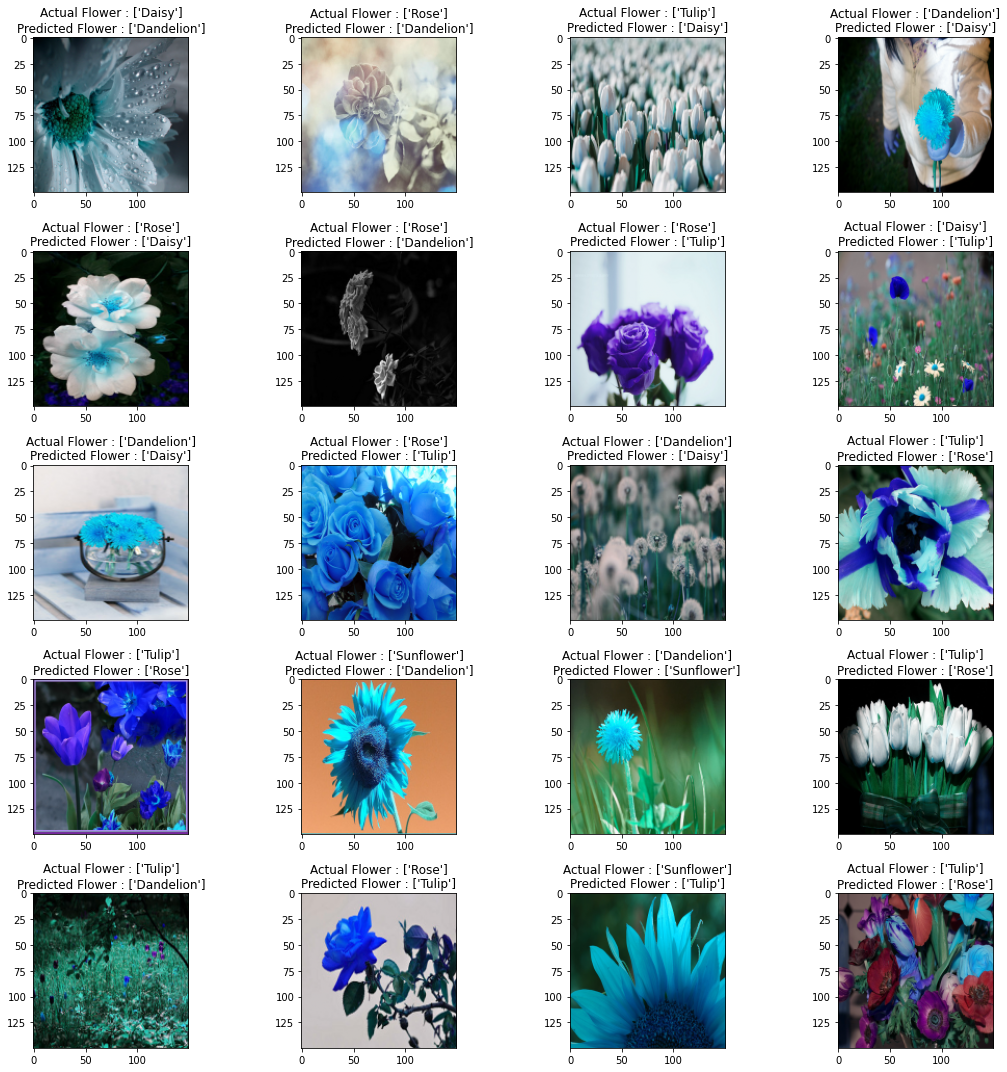

In [ ]:
fig,ax = plt.subplots(num_classes,4)
fig.set_size_inches(15,15)
#printing some wrongly found flowers
count = 0
for i in range (num_classes):
    for j in range (4):
        ax[i,j].imshow(X_test[incorr[count]])        
        ax[i,j].set_title("Actual Flower : "+str(encoder.inverse_transform([y_true[incorr[count]]])) +  "\n" + "Predicted Flower : "+str(encoder.inverse_transform([y_pred[incorr[count]]])))

        count+=1
        
plt.tight_layout()

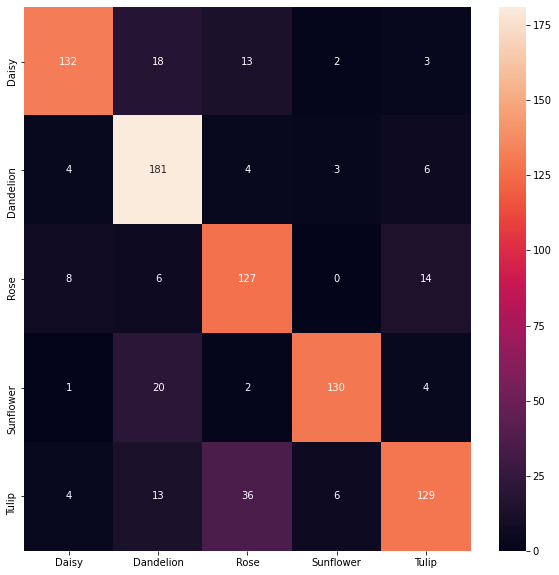

In [ ]:

#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(X_valid)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_valid,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(imagelabels))
ax.set_yticklabels(np.unique(imagelabels))
plt.show()

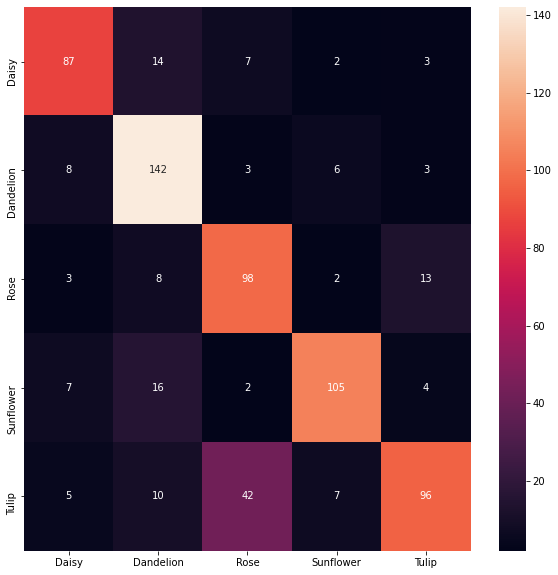

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd 
y_pred=model.predict(X_test)
y_pred_classes=np.argmax(y_pred,axis=1)
y_true=np.argmax(y_test,axis=1)
#compute conf mat
conf_mat=confusion_matrix(y_true,y_pred_classes)
#plot the con mat
#fruit_names=["Apple","Avocado","Banana","Cherry","Cocos","Kiwi","Lemon","Mango","Orange"]
f,ax=plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat,annot=True,fmt='.0f')
ax.set_xticklabels(np.unique(imagelabels))
ax.set_yticklabels(np.unique(imagelabels))
plt.show()